# Census Transform

The census transform is a non-parametric kernel-based intensity order descriptor and is invariant to global intensity changes. Every pixel of an image is represented by a binary vector, which encodes the spatial relationship of a center pixel with respect to the gray values of pixels in a local neighborhood. Considering the 8 neighbors of a reference pixel in a $ 3 \times 3 $ neighborhood, every bit of the 8 bit binary vector encodes, which pixel has higher or lower intensity.

We implemented the census transform as layer operation for PyTorch and show its effect in the following example. We load the famous camera man image and add 0.1 to every pixel to simulate global intensity change. The difference between `img1` and `img2` is greater than 0. However, after census transforming both images, the difference is 0.

In [1]:
import torch
from census_transform import CensusTransform
from skimage import data, img_as_float
from matplotlib import pyplot as plt
import numpy as np

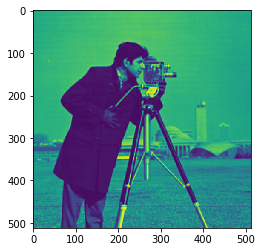

In [2]:
img1 = img_as_float(data.camera())
plt.figure()
plt.imshow(img1)
plt.show()

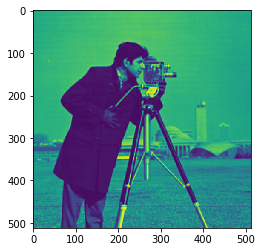

In [3]:
# add global intensity change (you won't see it though due to matplotlib's color mapping)
img2 = (img1 + 0.1)
plt.figure()
plt.imshow(img2)
plt.show()

In [4]:
print(np.linalg.norm(img2 - img1))

51.2000000000005


In [5]:
img1_t = torch.Tensor(img1).unsqueeze(0).unsqueeze(0)  # inputs need to be 4D array with [N x C x H x W]
img2_t = torch.Tensor(img2).unsqueeze(0).unsqueeze(0)
census = CensusTransform()

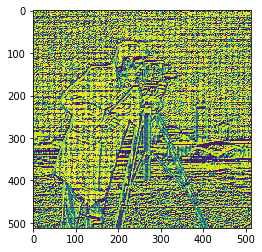

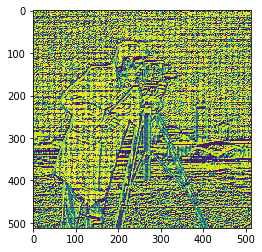

In [6]:
img1_tc = census(img1_t)[0, 0]
img2_tc = census(img2_t)[0, 0]
plt.figure()
plt.imshow(img1_tc)
plt.figure()
plt.imshow(img2_tc)
plt.show()

In [7]:
print(np.linalg.norm(img2_tc - img1_tc))

0.0


## Contact

Max-Heinrich Laves  
[laves@imes.uni-hannover.de](mailto:laves@imes.uni-hannover.de)  
[@MaxLaves](https://twitter.com/MaxLaves)

Institute of Mechatronic Systems  
Leibniz Universität Hannover  
Appelstr. 11A, 30167 Hannover, Germany